In [1]:
from dis import dis
from tkinter.tix import AUTO
from requests import head
import torch
import config
import os
from glob import glob
from shutil import copyfile
import pandas as pd
import re
import numpy as np
from math import sqrt
import math
import tensorflow as tf
from keras import regularizers
from tensorflow.keras import Model, Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from re import X
import numpy as np
import torch
import pandas as pd
from torch.nn.utils.rnn import pack_padded_sequence
from torch.utils.data import DataLoader
from CustomDataset import CustomRawDataset
from model_dispatcher import dispatch_model
# from model_dispatcher_cnn import dispatch_model
import config
from torch import nn
import os
from glob import glob
from torch.optim import Adam, SGD
from torch.optim.lr_scheduler import ReduceLROnPlateau
from datetime import date, timedelta, datetime
import time
import random
from torch.utils.tensorboard import SummaryWriter
from CustomDataset import custom_collate_fn
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation,TimeDistributed
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\acer\AppData\Local\Temp\ipykernel_21104\4271784750.py:2: DeprecationWarning: The Tix Tk extension is unmaintained, and the tkinter.tix wrapper module is deprecated in favor of tkinter.ttk
  from tkinter.tix import AUTO


In [29]:
raw_angle_files_1 = glob(os.path.join("D:\Research_Project\My_project_22\input\preprocessed", "*", "*.csv"))
# print(raw_angle_files_1)
all_filenames = [i for i in raw_angle_files_1]
df = pd.concat(map(pd.read_csv, all_filenames),ignore_index=True)
data=df
data.to_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\merged.csv",index=False)
#df=pd.read_csv(r"D:\Research_Project\My_project_22\FEATURES_EXTRACTED\DISTANCES\both_hand_frontup_left_leg_frontup\aatish_both_hand_frontup_left_leg_frontup_trial1_interpolated.csv")
   
# data=df
# print(data.shape)
# target=data['54']
# data=data.drop(['54'],axis=1)
# # data.head()
# print(data.shape)
# AutoEncoder(data)
# data['12']=target
# print(data.shape)

In [2]:
data=pd.read_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\merged_modified.csv")
data.head()
target=data['target']
data=data.drop(['target'],axis=1)
# data.head()
# print(data.shape)
# AutoEncoder(data)
# data['12']=target
# print(data.shape)
print(data.shape)
print(target.shape)

(12260, 166)
(12260,)


In [3]:
model = ExtraTreesClassifier()
model.fit(data,target)
# print(data.head())
# print(target.head())
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
# print("data col",data.columns)
feat_importances = pd.Series(model.feature_importances_, index=data.columns)
# print(feat_importances)


lst=list(feat_importances.nlargest(26).index)
# print(lst)
data=data[lst]

In [4]:

data.head()

,9,centroid_19_16_15_a,centroid_0_15_19_a,12,centroid_0_14_18_c,centroid_15_12_19_a,centroid_0_14_18_a,centroid_20_9_1_c,centroid_0_13_17_c,10,...,centroid_19_16_15_c,6,dist_7_11,centroid_15_12_19_c,centroid_3_23_16_c,centroid_20_0_23_c,centroid_15_1_10_a,centroid_3_23_16_a,dist_6_11,centroid_0_15_19_c
0,0.162107,0.397397,0.373833,0.113375,2.316167,0.346157,0.375580,2.216000,2.270467,-0.027582,...,2.259500,-0.140846,0.413883,2.261033,2.172967,2.194800,0.423117,0.483507,0.414414,2.272500
1,0.157114,0.401893,0.378393,0.088090,2.317200,0.350710,0.379317,2.224300,2.277767,-0.009114,...,2.266967,-0.147442,0.418007,2.268333,2.187567,2.210400,0.426360,0.482320,0.436329,2.279833
2,0.156264,0.403303,0.379813,0.079567,2.317700,0.352113,0.380610,2.227500,2.280433,-0.002401,...,2.269333,-0.148863,0.419052,2.270667,2.193733,2.217000,0.427293,0.482950,0.442395,2.282167
3,0.155941,0.403313,0.379817,0.078291,2.317867,0.352107,0.380717,2.228000,2.280833,-0.001148,...,2.269467,-0.148812,0.419222,2.270800,2.194400,2.217733,0.427303,0.483680,0.441379,2.282300
4,0.155132,0.403287,0.379800,0.077394,2.317967,0.352097,0.380730,2.228167,2.280933,-0.000888,...,2.269467,-0.149545,0.419968,2.270833,2.193033,2.216367,0.427320,0.483077,0.441859,2.282333


9                      0.013885
centroid_19_16_15_a    0.012775
centroid_0_15_19_a     0.012559
12                     0.012386
centroid_0_14_18_c     0.012169
centroid_15_12_19_a    0.012017
centroid_0_14_18_a     0.011712
centroid_20_9_1_c      0.011647
centroid_0_13_17_c     0.011593
10                     0.011421
13                     0.010810
centroid_20_9_1_a      0.010671
centroid_20_5_1_c      0.010199
centroid_0_13_17_a     0.010090
centroid_20_5_1_a      0.010001
centroid_9_23_16_a     0.009878
centroid_19_16_15_c    0.009604
6                      0.009538
dist_7_11              0.009486
centroid_15_12_19_c    0.009465
centroid_3_23_16_c     0.009266
centroid_20_0_23_c     0.009108
centroid_15_1_10_a     0.008998
centroid_3_23_16_a     0.008912
dist_6_11              0.008878
centroid_0_15_19_c     0.008814
dtype: float64


Text(0, 0.5, 'features')

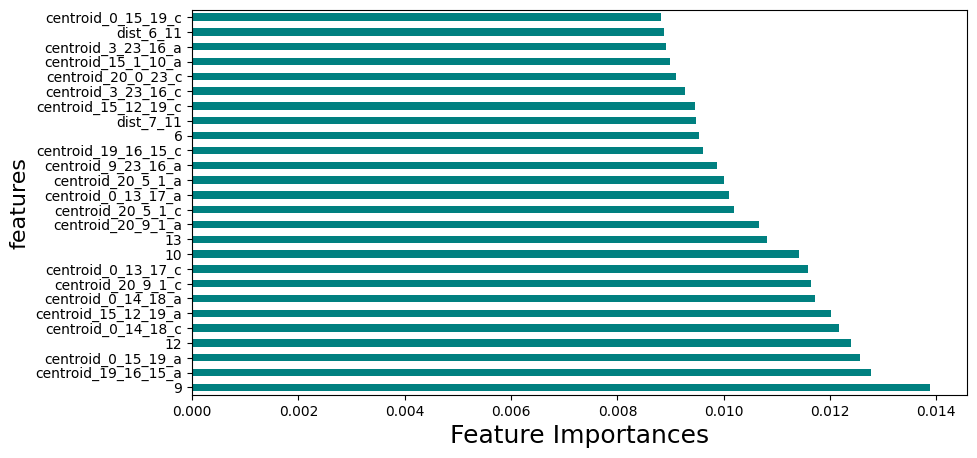

In [5]:
print(feat_importances.nlargest(26))
feat_importances.nlargest(26).plot(kind="barh", color = "teal",figsize=(10,5))
plt.xlabel('Feature Importances',fontsize=18)
plt.ylabel('features',fontsize=16)

In [6]:
data['target']=target
data.head()

# data.to_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\tree_classifier_extracted.csv",index=False)


,9,centroid_19_16_15_a,centroid_0_15_19_a,12,centroid_0_14_18_c,centroid_15_12_19_a,centroid_0_14_18_a,centroid_20_9_1_c,centroid_0_13_17_c,10,...,6,dist_7_11,centroid_15_12_19_c,centroid_3_23_16_c,centroid_20_0_23_c,centroid_15_1_10_a,centroid_3_23_16_a,dist_6_11,centroid_0_15_19_c,target
0,0.162107,0.397397,0.373833,0.113375,2.316167,0.346157,0.375580,2.216000,2.270467,-0.027582,...,-0.140846,0.413883,2.261033,2.172967,2.194800,0.423117,0.483507,0.414414,2.272500,0
1,0.157114,0.401893,0.378393,0.088090,2.317200,0.350710,0.379317,2.224300,2.277767,-0.009114,...,-0.147442,0.418007,2.268333,2.187567,2.210400,0.426360,0.482320,0.436329,2.279833,0
2,0.156264,0.403303,0.379813,0.079567,2.317700,0.352113,0.380610,2.227500,2.280433,-0.002401,...,-0.148863,0.419052,2.270667,2.193733,2.217000,0.427293,0.482950,0.442395,2.282167,0
3,0.155941,0.403313,0.379817,0.078291,2.317867,0.352107,0.380717,2.228000,2.280833,-0.001148,...,-0.148812,0.419222,2.270800,2.194400,2.217733,0.427303,0.483680,0.441379,2.282300,0
4,0.155132,0.403287,0.379800,0.077394,2.317967,0.352097,0.380730,2.228167,2.280933,-0.000888,...,-0.149545,0.419968,2.270833,2.193033,2.216367,0.427320,0.483077,0.441859,2.282333,0


In [7]:
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :26], sequences[end_ix-1, 26:]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [8]:
data=pd.read_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\extraa_tree_classifier_extracted_modified.csv")
data=pd.get_dummies(data,columns=['target'])
data=data.to_numpy()
x,y=split_sequences(data,6)
print(y.shape)

# target=data['26']
# data=data.drop(['26'],axis=1)
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size = 0.2)



# Model building
n_steps=6

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 26), return_sequences=True))
model.add(LSTM(30, activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()
# log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(x.shape)
history = model.fit(x_train, y_train,batch_size=config.BATCH_SIZE,epochs=100,validation_data=(x_test,y_test),verbose=1)
results = model.evaluate(x_test, y_test)
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
y_test=np.argmax(y_test,axis=1)
# print(y_pred)
cf_matrix=confusion_matrix(y_test,y_pred)
print('Confusion matrix\n',cf_matrix)
print(classification_report(y_test,y_pred))

(12255, 10)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 50)             15400     
                                                                 
 lstm_1 (LSTM)               (None, 30)                9720      
                                                                 
 dense (Dense)               (None, 10)                310       
                                                                 
Total params: 25,430
Trainable params: 25,430
Non-trainable params: 0
_________________________________________________________________
(12255, 6, 26)
Epoch 1/100
154/154 [==============================] - 122s 679ms/step - loss: 2.0415 - accuracy: 0.2539 - val_loss: 1.7619 - val_accuracy: 0.3888
Epoch 2/100
154/154 [==============================] - 100s 654ms/step - loss: 1.6991 - accuracy: 0.4608 - val_loss: 1.6804 - val_accuracy: 0.

In [9]:
cf_matrix=confusion_matrix(y_test,y_pred)
print('Confusion matrix\n',cf_matrix)
print(classification_report(y_test,y_pred))

Confusion matrix
 [[264   0   1   1   0   0   0   0   0   0]
 [  1 224   0   0   0   0   0   1   0   1]
 [  0   1 266   2   1   0   0   0   0   0]
 [  0   0   1 254   0   0   2   0   1   0]
 [  1   0   0   1 228   2   1   0   1   1]
 [  0   1   0   0   2 202   1   0   1   0]
 [  0   0   0   1   1   3 276   5   0   0]
 [  1   0   0   1   0   2   4 232   1   1]
 [  0   1   0   0   2   2   1   0 257   0]
 [  0   0   0   0   1   0   2   0   2 192]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       266
           1       0.99      0.99      0.99       227
           2       0.99      0.99      0.99       270
           3       0.98      0.98      0.98       258
           4       0.97      0.97      0.97       235
           5       0.96      0.98      0.97       207
           6       0.96      0.97      0.96       286
           7       0.97      0.96      0.97       242
           8       0.98      0.98      0.98       263
          

In [10]:

print('specificity:')
tot=0
for i in range (10):
    sum=0
    for j in range(10):
        sum=sum+cf_matrix[i,j]
    spec=cf_matrix[i,i]/sum
    tot+=spec
    print(i," ",spec)
print('specificity avg\n',tot/10)




specificity:
0   0.9924812030075187
1   0.986784140969163
2   0.9851851851851852
3   0.9844961240310077
4   0.9702127659574468
5   0.9758454106280193
6   0.965034965034965
7   0.9586776859504132
8   0.9771863117870723
9   0.9746192893401016
specificity avg
 0.9770523081890893


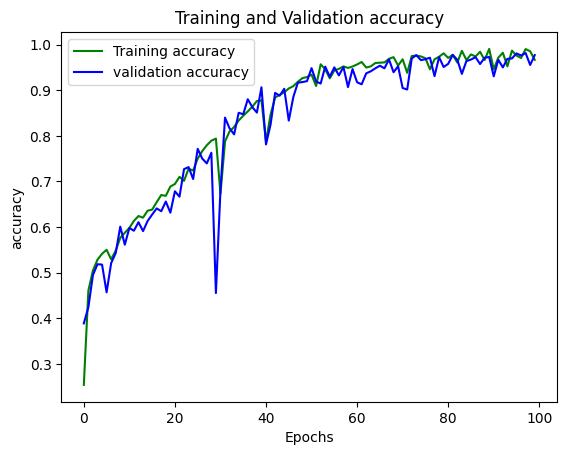

In [11]:
acc_train = history.history["accuracy"]
acc_val = history.history["val_accuracy"]
epochs = range(1,99)
plt.plot(acc_train, 'g', label='Training accuracy')
plt.plot(acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

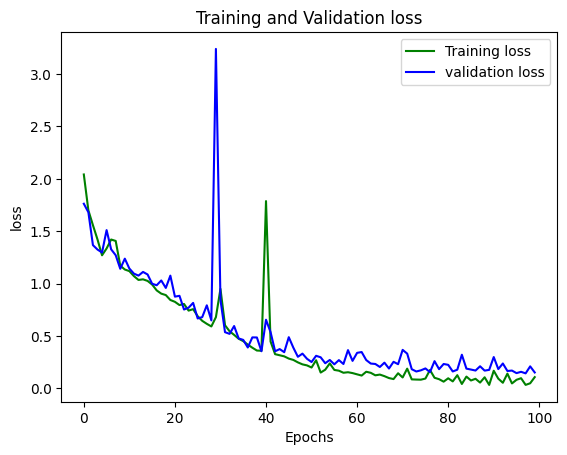

In [12]:
loss_train = history.history["loss"]
loss_val = history.history["val_loss"]
epochs = range(1,99)
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()